In [87]:
!pip install opencv-python
!pip install pytesseract


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
import cv2
import pytesseract

In [89]:
pytesseract.pytesseract.tesseract_cmd =r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [90]:
img=cv2.imread('sample2.jpg')

In [91]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [92]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [93]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

In [94]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

In [95]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

In [96]:
contours = sorted(contours, key=lambda ctr: (cv2.boundingRect(ctr)[1], cv2.boundingRect(ctr)[0]))


In [97]:
img2 = img.copy()

In [98]:
file = open("recognized.txt", "w+")

In [99]:
file.write("")

0

In [100]:
file.close()

In [101]:
with open("recognized.txt", "w", encoding="utf-8") as file:
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cropped = gray[y:y + h, x:x + w]
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(cropped, config=custom_config)
        clean_lines = [line.strip() for line in text.split('\n') if line.strip()]
        for line in clean_lines:
            file.write(line + "\n")

In [102]:
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [103]:
import matplotlib.pyplot as plt
import numpy as np

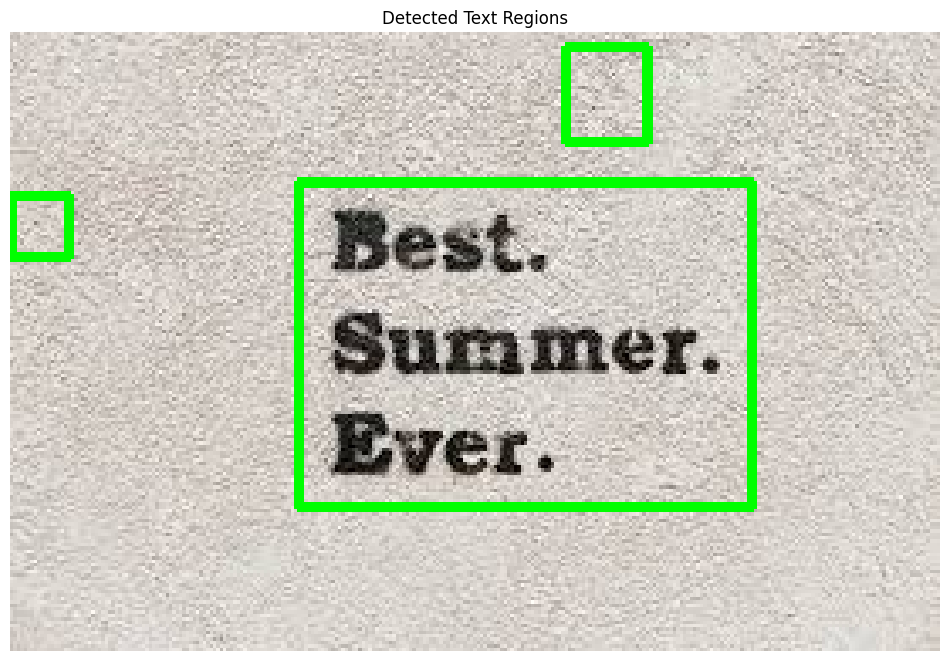

In [104]:
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Detected Text Regions")
plt.show()